In [76]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [ ]:
# Seed
torch.manual_seed(0)
np.random.seed(0)

# MNIST DATASET

In [77]:
# Data Loading
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='../data', train=False, download=True, transform=transform)

# split train dataset for train and validation
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Filter out zeros from training data
train_data = []
train_labels = []
for data, label in train_dataset:
    if label != 0:
        train_data.append(data.view(-1))
        train_labels.append(label)

# Keep all training data
train_data = torch.stack(train_data)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# Keep all validation data
val_data = torch.stack([data.view(-1) for data, _ in val_set])
val_labels = torch.tensor([label for _, label in val_set])
val_loader = DataLoader(TensorDataset(val_data, val_labels), batch_size=128)

# Keep all test data
test_data = torch.stack([data.view(-1) for data, _ in test_dataset])
test_labels = torch.tensor([label for _, label in test_dataset])
test_loader = DataLoader(TensorDataset(test_data, test_labels), batch_size=128)


In [78]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [79]:
val_data.shape

torch.Size([10000, 784])

In [80]:
print(torch.unique(torch.tensor(val_labels), return_counts=True))
print(torch.unique(torch.tensor(test_labels), return_counts=True))
print(torch.unique(torch.tensor(train_labels), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1000, 1084,  992, 1022,  986,  915,  958, 1059,  952, 1032]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_38345/435634570.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(val_labels), return_counts=True))
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_38345/435634570.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(test_labels), return_counts=True))


In [81]:
# ------------------- -------------------
# Decrease amount of 1-9 digits in validation data set to 1/9 of its current amount
# ------------------- -------------------

indices_1_9 = (val_labels != 0).nonzero(as_tuple=True)[0]
indices_1_9 = val_labels != 0
indices_0 = val_labels == 0

print(len(val_data[indices_0]))
print(len(val_data[indices_1_9]))

# Randomly choose 1000 examples from val_data[indices_1_9]
num_samples = 1000
random_indices = torch.randperm(len(val_data[indices_1_9]))[:num_samples]
val_data_reduced = val_data[indices_1_9][random_indices]
val_labels_reduced = val_labels[indices_1_9][random_indices]

print(len(val_data_reduced))
print(len(val_labels_reduced))

print(torch.unique(val_labels_reduced, return_counts=True))

val_data_reduced = torch.cat((val_data_reduced, val_data[indices_0]), dim=0)
val_labels_reduced = torch.cat((val_labels_reduced, val_labels[indices_0]), dim=0)

print(len(val_data_reduced))
print(len(val_labels_reduced))

print(torch.unique(val_labels_reduced, return_counts=True))

# Reduced validation data loader
val_loader_reduced = DataLoader(TensorDataset(val_data_reduced, val_labels_reduced), batch_size=128, shuffle=True) # shuffle is optional

1000
9000
1000
1000
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([127, 112, 120,  99, 106, 120, 119, 100,  97]))
2000
2000
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1000,  127,  112,  120,   99,  106,  120,  119,  100,   97]))


In [82]:
print(torch.unique(torch.tensor(val_labels_reduced), return_counts=True))
print(torch.unique(torch.tensor(test_labels), return_counts=True))
print(torch.unique(torch.tensor(train_labels), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1000,  127,  112,  120,   99,  106,  120,  119,  100,   97]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_38345/2262724207.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(val_labels_reduced), return_counts=True))
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_38345/2262724207.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(test_labels), return_counts=True))


In [ ]:
ALL_MODELS = []

# Autoencoders

## Autoencoders definitions

In [83]:
# SSIM Loss implementation
class SSIM(nn.Module):
    def __init__(self, window_size=11):
        super(SSIM, self).__init__()
        self.window_size = window_size
        self.channel = 1
        self.window = self.create_window()

    def gaussian(self, window_size, sigma=1.5):
        gauss = torch.Tensor([np.exp(-(x - window_size//2)**2/float(2*sigma**2)) for x in range(window_size)])
        return gauss/gauss.sum()

    def create_window(self):
        _1D_window = self.gaussian(self.window_size).unsqueeze(1)
        _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
        window = _2D_window.expand(self.channel, 1, self.window_size, self.window_size).contiguous()
        return window

    def forward(self, img1, img2):
        window = self.window.to(img1.device)
        return 1 - self._ssim(img1, img2, window)

    def _ssim(self, img1, img2, window):
        mu1 = nn.functional.conv2d(img1, window, padding=self.window_size//2, groups=self.channel)
        mu2 = nn.functional.conv2d(img2, window, padding=self.window_size//2, groups=self.channel)

        mu1_sq = mu1.pow(2)
        mu2_sq = mu2.pow(2)
        mu1_mu2 = mu1 * mu2

        sigma1_sq = nn.functional.conv2d(img1 * img1, window, padding=self.window_size//2, groups=self.channel) - mu1_sq
        sigma2_sq = nn.functional.conv2d(img2 * img2, window, padding=self.window_size//2, groups=self.channel) - mu2_sq
        sigma12 = nn.functional.conv2d(img1 * img2, window, padding=self.window_size//2, groups=self.channel) - mu1_mu2

        C1 = 0.01**2
        C2 = 0.03**2

        ssim_map = ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))
        return ssim_map.mean()
    
# za duzy latent space
# zmniejszyc liczbe neuronow
# weight decay mozna zmniejszyc
# oslabic architekture
# czasami ciezko jest zredukowac blad, bo model sie nauczy, zeby zwracac to samo co wejscie

# Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Autoencoder Model with 16 latent space
class Autoencoder_16(nn.Module):
    def __init__(self):
        super(Autoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# Autoencoder Model with 8 latent space
class Autoencoder_8(nn.Module):
    def __init__(self):
        super(Autoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# BigAutoencoder Model
class BigAutoencoder(nn.Module):
    def __init__(self):
        super(BigAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# BigAutoencoder Model
class BigAutoencoder_16(nn.Module):
    def __init__(self):
        super(BigAutoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
class BigAutoencoder_8(nn.Module):
    def __init__(self):
        super(BigAutoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# SmallAutoencoder Model
class SmallAutoencoder(nn.Module):
    def __init__(self):
        super(SmallAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# SmallAutoencoder Model with 16 latent space
class SmallAutoencoder_16(nn.Module):
    def __init__(self):
        super(SmallAutoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# SmallAutoencoder Model with 8 latent space
class SmallAutoencoder_8(nn.Module):
    def __init__(self):
        super(SmallAutoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



## SmallAutoencoder model

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/15], Train_loss: 0.0363, Val_loss: 0.0264
Model nr 0. Epoch [2/15], Train_loss: 0.0220, Val_loss: 0.0218
Model nr 0. Epoch [3/15], Train_loss: 0.0191, Val_loss: 0.0194
Model nr 0. Epoch [4/15], Train_loss: 0.0174, Val_loss: 0.0180
Model nr 0. Epoch [5/15], Train_loss: 0.0164, Val_loss: 0.0170
Model nr 0. Epoch [6/15], Train_loss: 0.0155, Val_loss: 0.0164
Model nr 0. Epoch [7/15], Train_loss: 0.0150, Val_loss: 0.0157
Model nr 0. Epoch [8/15], Train_loss: 0.0145, Val_loss: 0.0153
Model nr 0. Epoch [9/15], Train_loss: 0.0141, Val_loss: 0.0150
Model nr 0. Epoch [10/15], Train_loss: 0.0137, Val_loss: 0.0144
Model nr 0. Epoch [11/15], Train_loss: 0.0134, Val_loss: 0.0139
Model nr 0. Epoch [12/15], Train_loss: 0.0131, Val_loss: 0.0137
Model nr 0. Epoch [13/15], Train_loss: 0.0129, Val_loss: 0.0135
Model nr 0. Epoch [14/15], Train_loss: 0.0127, Val_loss: 0.0134
Model nr 0. Epoch [15/15], Train_loss: 0.0125, Val_loss: 0.0131
Model nr 1. Epoch [1/15

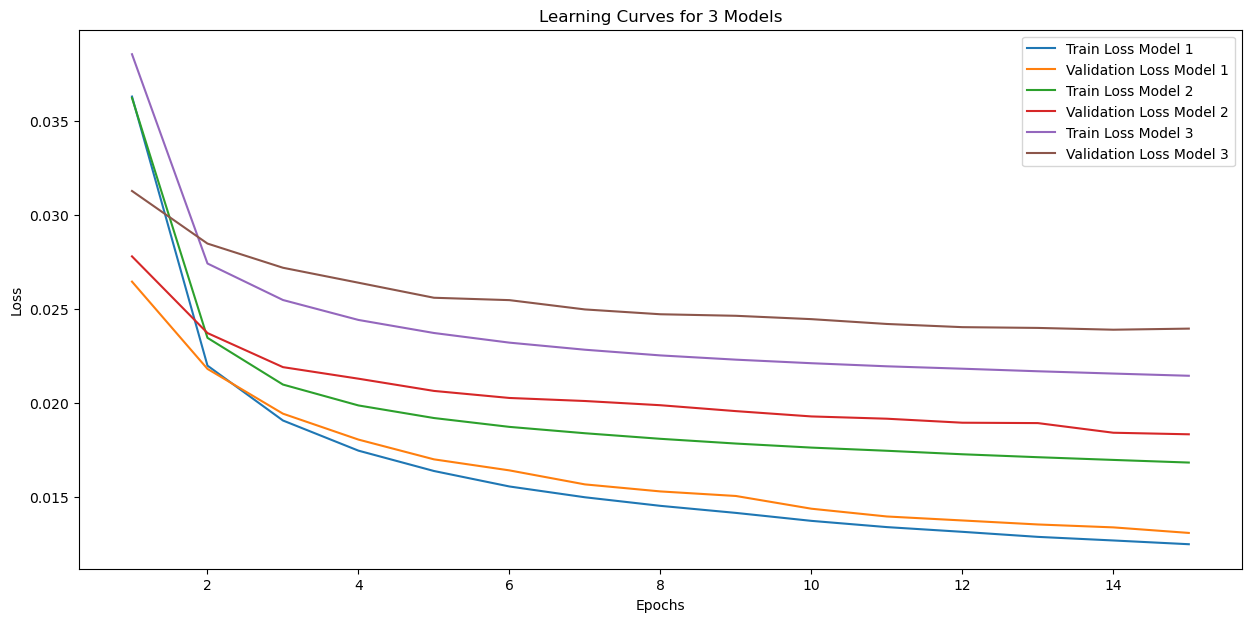

In [ ]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = SmallAutoencoder()
model_2 = SmallAutoencoder_16()
model_3 = SmallAutoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 15
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# adding models to list
ALL_MODELS.append(models)

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()

In [85]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == 0
    # indices of other digits
    other_indices = sorted_labels_indices != 0
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)

Model nr 0. Best Threshold: 0.4211
Model nr 0. Precision at Best Threshold: 0.7375
Model nr 0. Recall at Best Threshold: 0.8540
Model nr 1. Best Threshold: 0.4211
Model nr 1. Precision at Best Threshold: 0.8117
Model nr 1. Recall at Best Threshold: 0.9400
Model nr 2. Best Threshold: 0.4737
Model nr 2. Precision at Best Threshold: 0.8803
Model nr 2. Recall at Best Threshold: 0.9270


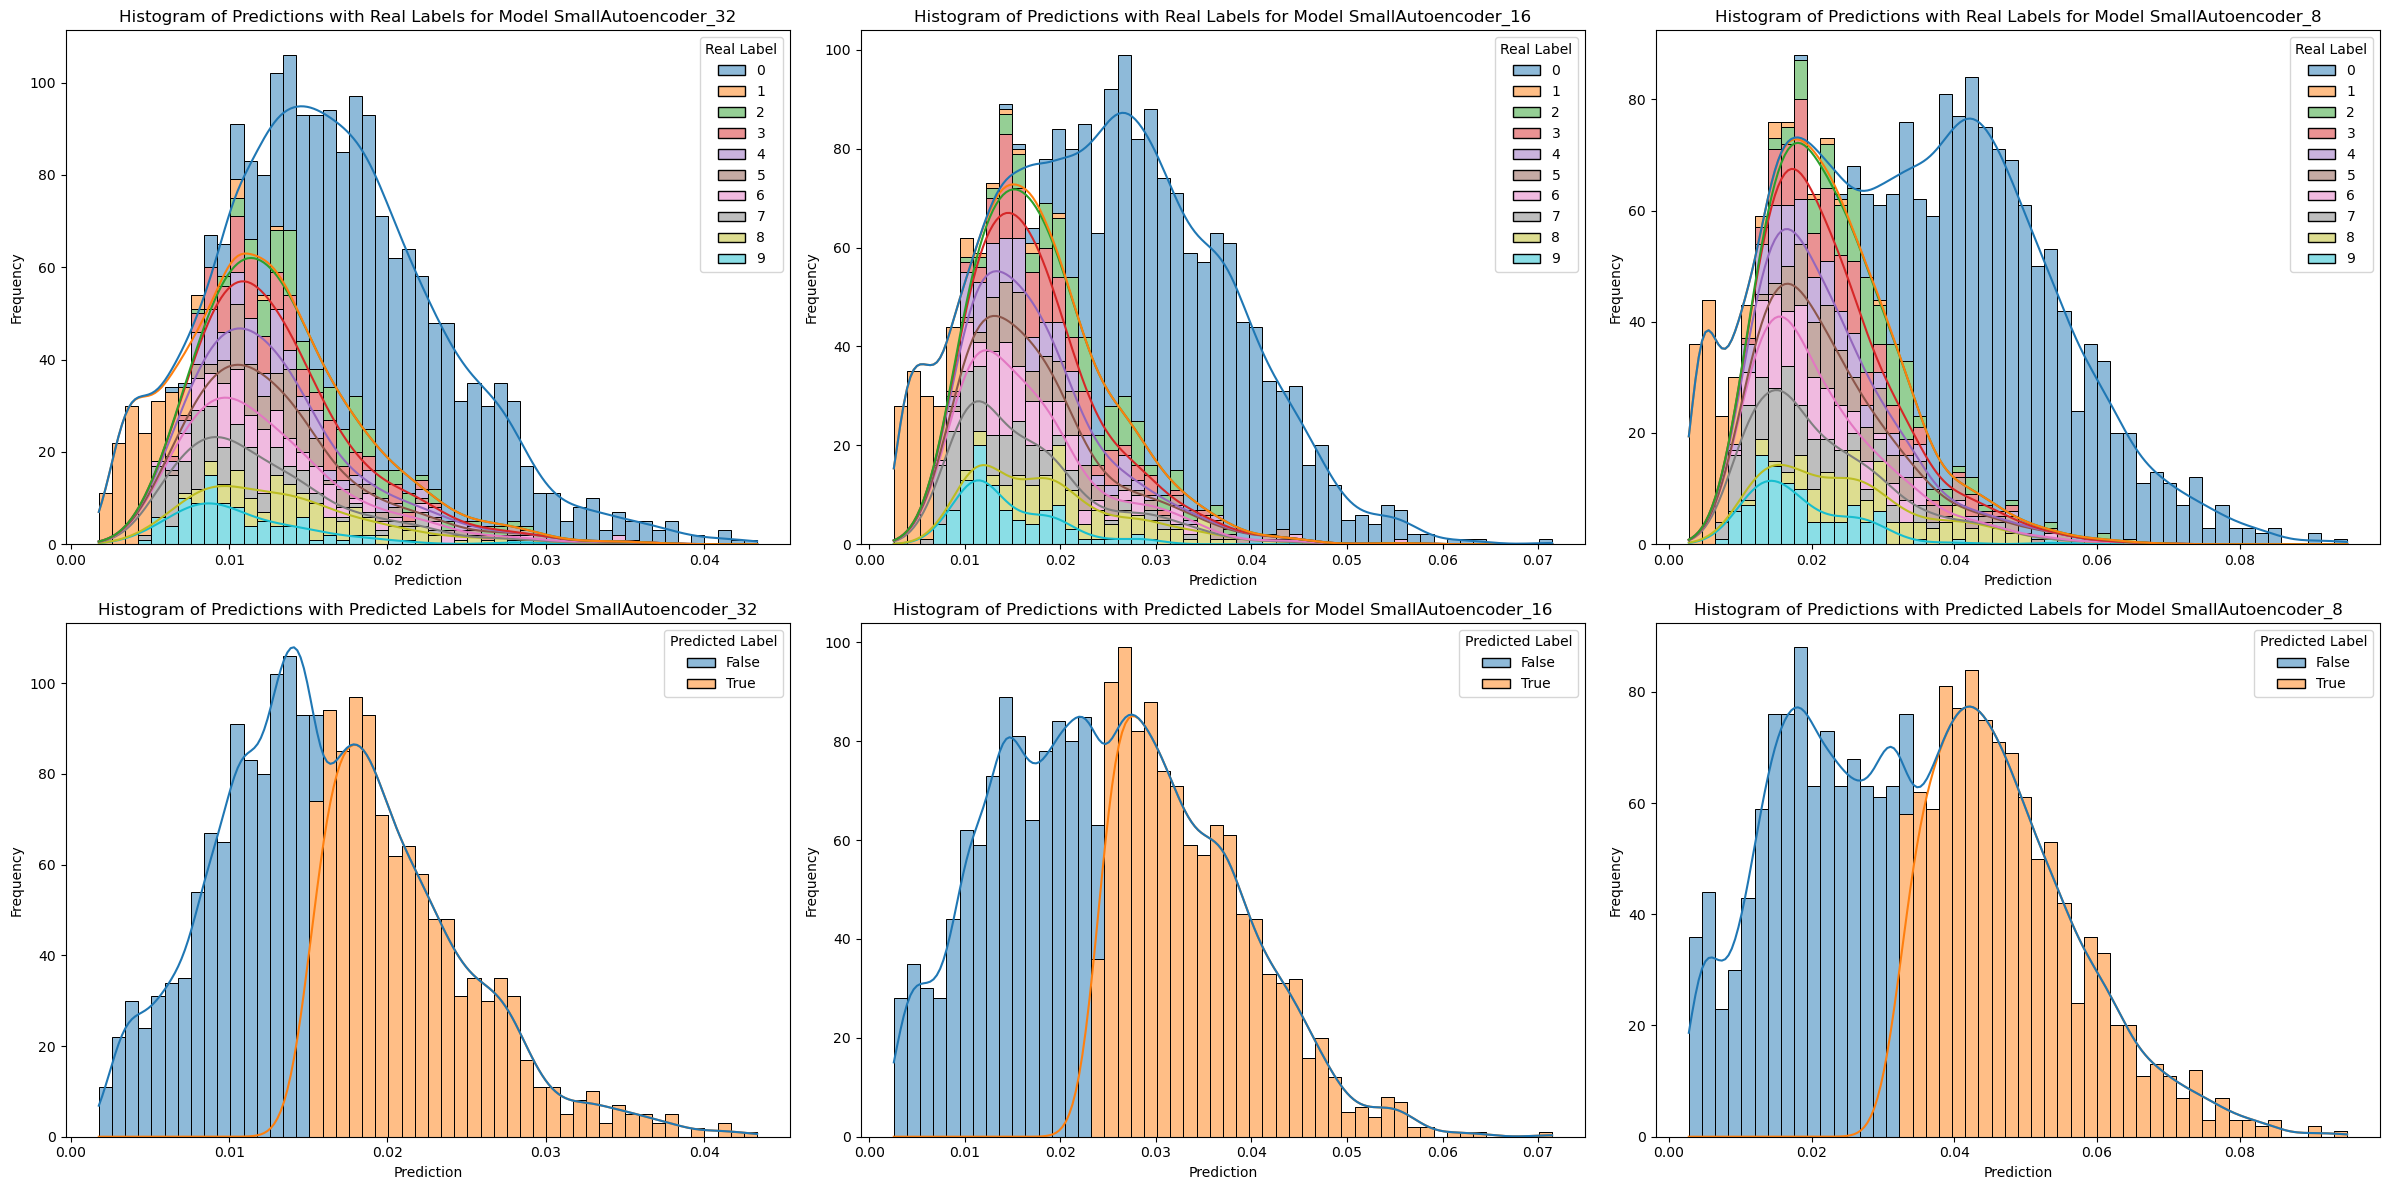

In [86]:
import seaborn as sns
import pandas as pd

names = {
    0: 'SmallAutoencoder_32',
    1: 'SmallAutoencoder_16',
    2: 'SmallAutoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

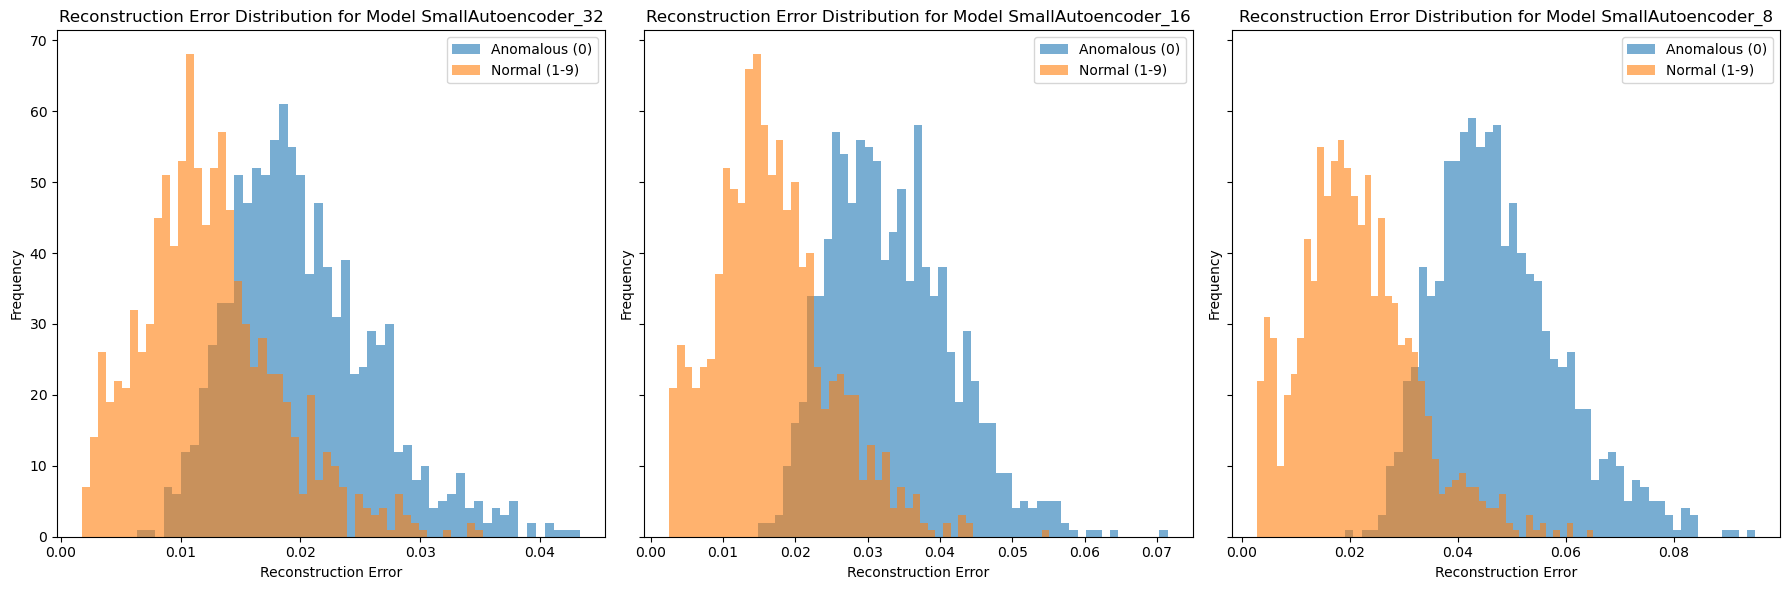

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [88]:
# # Function to calculate reconstruction loss
# def calculate_reconstruction_loss(data, model):
#     reconstructions = model(data)
#     reconstruction_errors = torch.mean(torch.abs(data - reconstructions), axis=1)
#     return reconstruction_errors

# # Calculate reconstruction loss for normal and anomalous images
# for i in range(10):
#     anomalous_images = test_data[test_labels == i]
#     anomalous_images_tensor = torch.tensor(anomalous_images, dtype=torch.float32).to(device)
#     reconstruction_loss_anomalous = calculate_reconstruction_loss(anomalous_images_tensor, model)
#     print(f"Anomalous images of number {i}: {reconstruction_loss_anomalous.mean()}")


# reconstruction_loss_normal = calculate_reconstruction_loss(next(iter(test_loader))[0].to(device), model)
# print(f"Normal images: {reconstruction_loss_normal.mean()}")


In [89]:
# # Reconstruct images from test_loader and plot those with the biggest loss
# import matplotlib.pyplot as plt

# # Get a batch of test data
# test_images, _ = next(iter(test_loader))
# test_images = test_images.to(device)

# # Calculate reconstruction loss for the batch
# reconstruction_losses = calculate_reconstruction_loss(test_images, model)
# print(reconstruction_losses)

# # Get indices of images with the biggest loss
# num_images_to_plot = 5
# _, indices = torch.topk(reconstruction_losses, num_images_to_plot)

# print(reconstruction_losses[indices])

# # Plot the original and reconstructed images with the biggest loss
# fig, axes = plt.subplots(num_images_to_plot, 2, figsize=(10, 10))

# for i, idx in enumerate(indices):
#     original_image = test_images[idx].cpu().view(28, 28).detach().numpy()
#     reconstructed_image = model(test_images[idx].unsqueeze(0)).cpu().view(28, 28).detach().numpy()

#     axes[i, 0].imshow(original_image, cmap='gray')
#     axes[i, 0].set_title(f'Original Image {i+1}')
#     axes[i, 0].axis('off')

#     axes[i, 1].imshow(reconstructed_image, cmap='gray')
#     axes[i, 1].set_title(f'Reconstructed Image {i+1}')
#     axes[i, 1].axis('off')

# plt.tight_layout()
# plt.show()

In [90]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Get predictions and actual labels
# predictions = []
# actual = []

# model.eval()
# with torch.no_grad():
#     for data, labels in test_loader:
#         data = data.to(device)
#         outputs = model(data)
#         reconstruction_errors = torch.mean(torch.abs(data - outputs), axis=1)
#         preds = reconstruction_errors > threshold
#         predictions.extend(preds.cpu().numpy())
#         actual.extend(labels.cpu().numpy())

# # Convert lists to numpy arrays
# predictions = np.array(predictions)
# actual = np.array(actual)

# # Calculate metrics
# accuracy = accuracy_score(actual, predictions)
# precision = precision_score(actual, predictions, average='binary')
# recall = recall_score(actual, predictions, average='binary')
# f1 = f1_score(actual, predictions, average='binary')

# print(f'Accuracy: {accuracy:.4f}')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1 Score: {f1:.4f}')

## BigAutoencoder Model

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/25], Train_loss: 0.0513, Val_loss: 0.0398
Model nr 0. Epoch [2/25], Train_loss: 0.0313, Val_loss: 0.0315
Model nr 0. Epoch [3/25], Train_loss: 0.0267, Val_loss: 0.0286
Model nr 0. Epoch [4/25], Train_loss: 0.0245, Val_loss: 0.0269
Model nr 0. Epoch [5/25], Train_loss: 0.0230, Val_loss: 0.0253
Model nr 0. Epoch [6/25], Train_loss: 0.0216, Val_loss: 0.0240
Model nr 0. Epoch [7/25], Train_loss: 0.0204, Val_loss: 0.0230
Model nr 0. Epoch [8/25], Train_loss: 0.0193, Val_loss: 0.0219
Model nr 0. Epoch [9/25], Train_loss: 0.0185, Val_loss: 0.0210
Model nr 0. Epoch [10/25], Train_loss: 0.0178, Val_loss: 0.0205
Model nr 0. Epoch [11/25], Train_loss: 0.0173, Val_loss: 0.0199
Model nr 0. Epoch [12/25], Train_loss: 0.0168, Val_loss: 0.0193
Model nr 0. Epoch [13/25], Train_loss: 0.0165, Val_loss: 0.0190
Model nr 0. Epoch [14/25], Train_loss: 0.0161, Val_loss: 0.0188
Model nr 0. Epoch [15/25], Train_loss: 0.0158, Val_loss: 0.0181
Model nr 0. Epoch [16/2

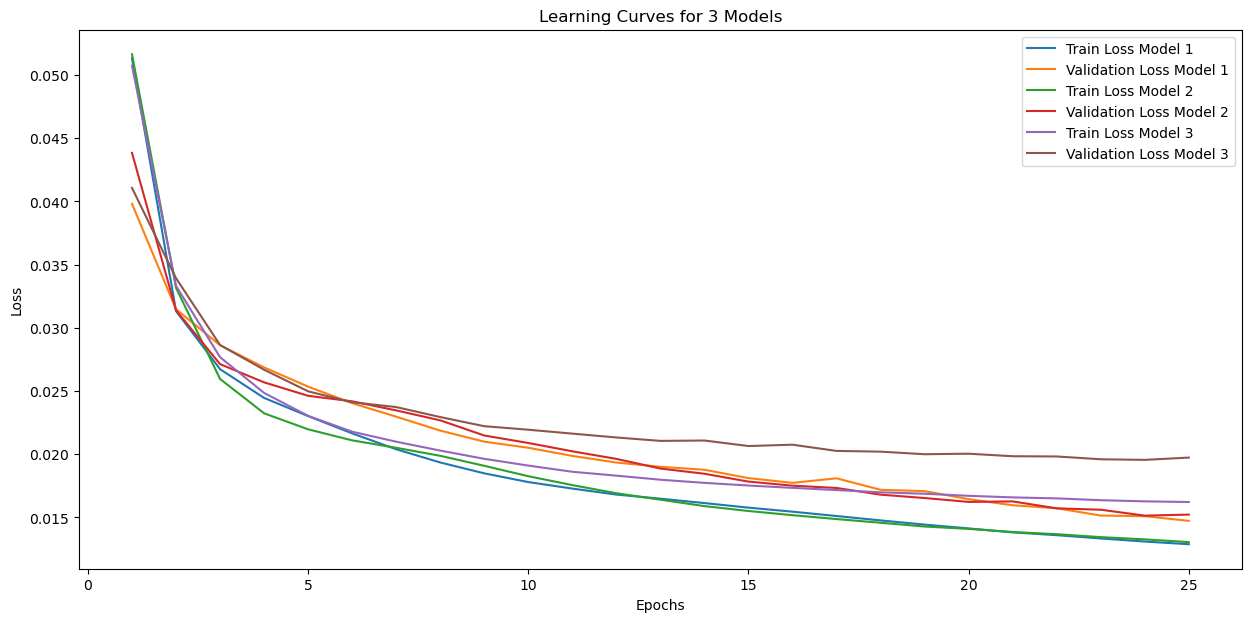

In [91]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = BigAutoencoder()
model_2 = BigAutoencoder_16()
model_3 = BigAutoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 25
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# adding models to list
ALL_MODELS.append(models)

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()


In [92]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == 0
    # indices of other digits
    other_indices = sorted_labels_indices != 0
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)



Model nr 0. Best Threshold: 0.4737
Model nr 0. Precision at Best Threshold: 0.9069
Model nr 0. Recall at Best Threshold: 0.9550
Model nr 1. Best Threshold: 0.4737
Model nr 1. Precision at Best Threshold: 0.9041
Model nr 1. Recall at Best Threshold: 0.9520
Model nr 2. Best Threshold: 0.4737
Model nr 2. Precision at Best Threshold: 0.9326
Model nr 2. Recall at Best Threshold: 0.9820


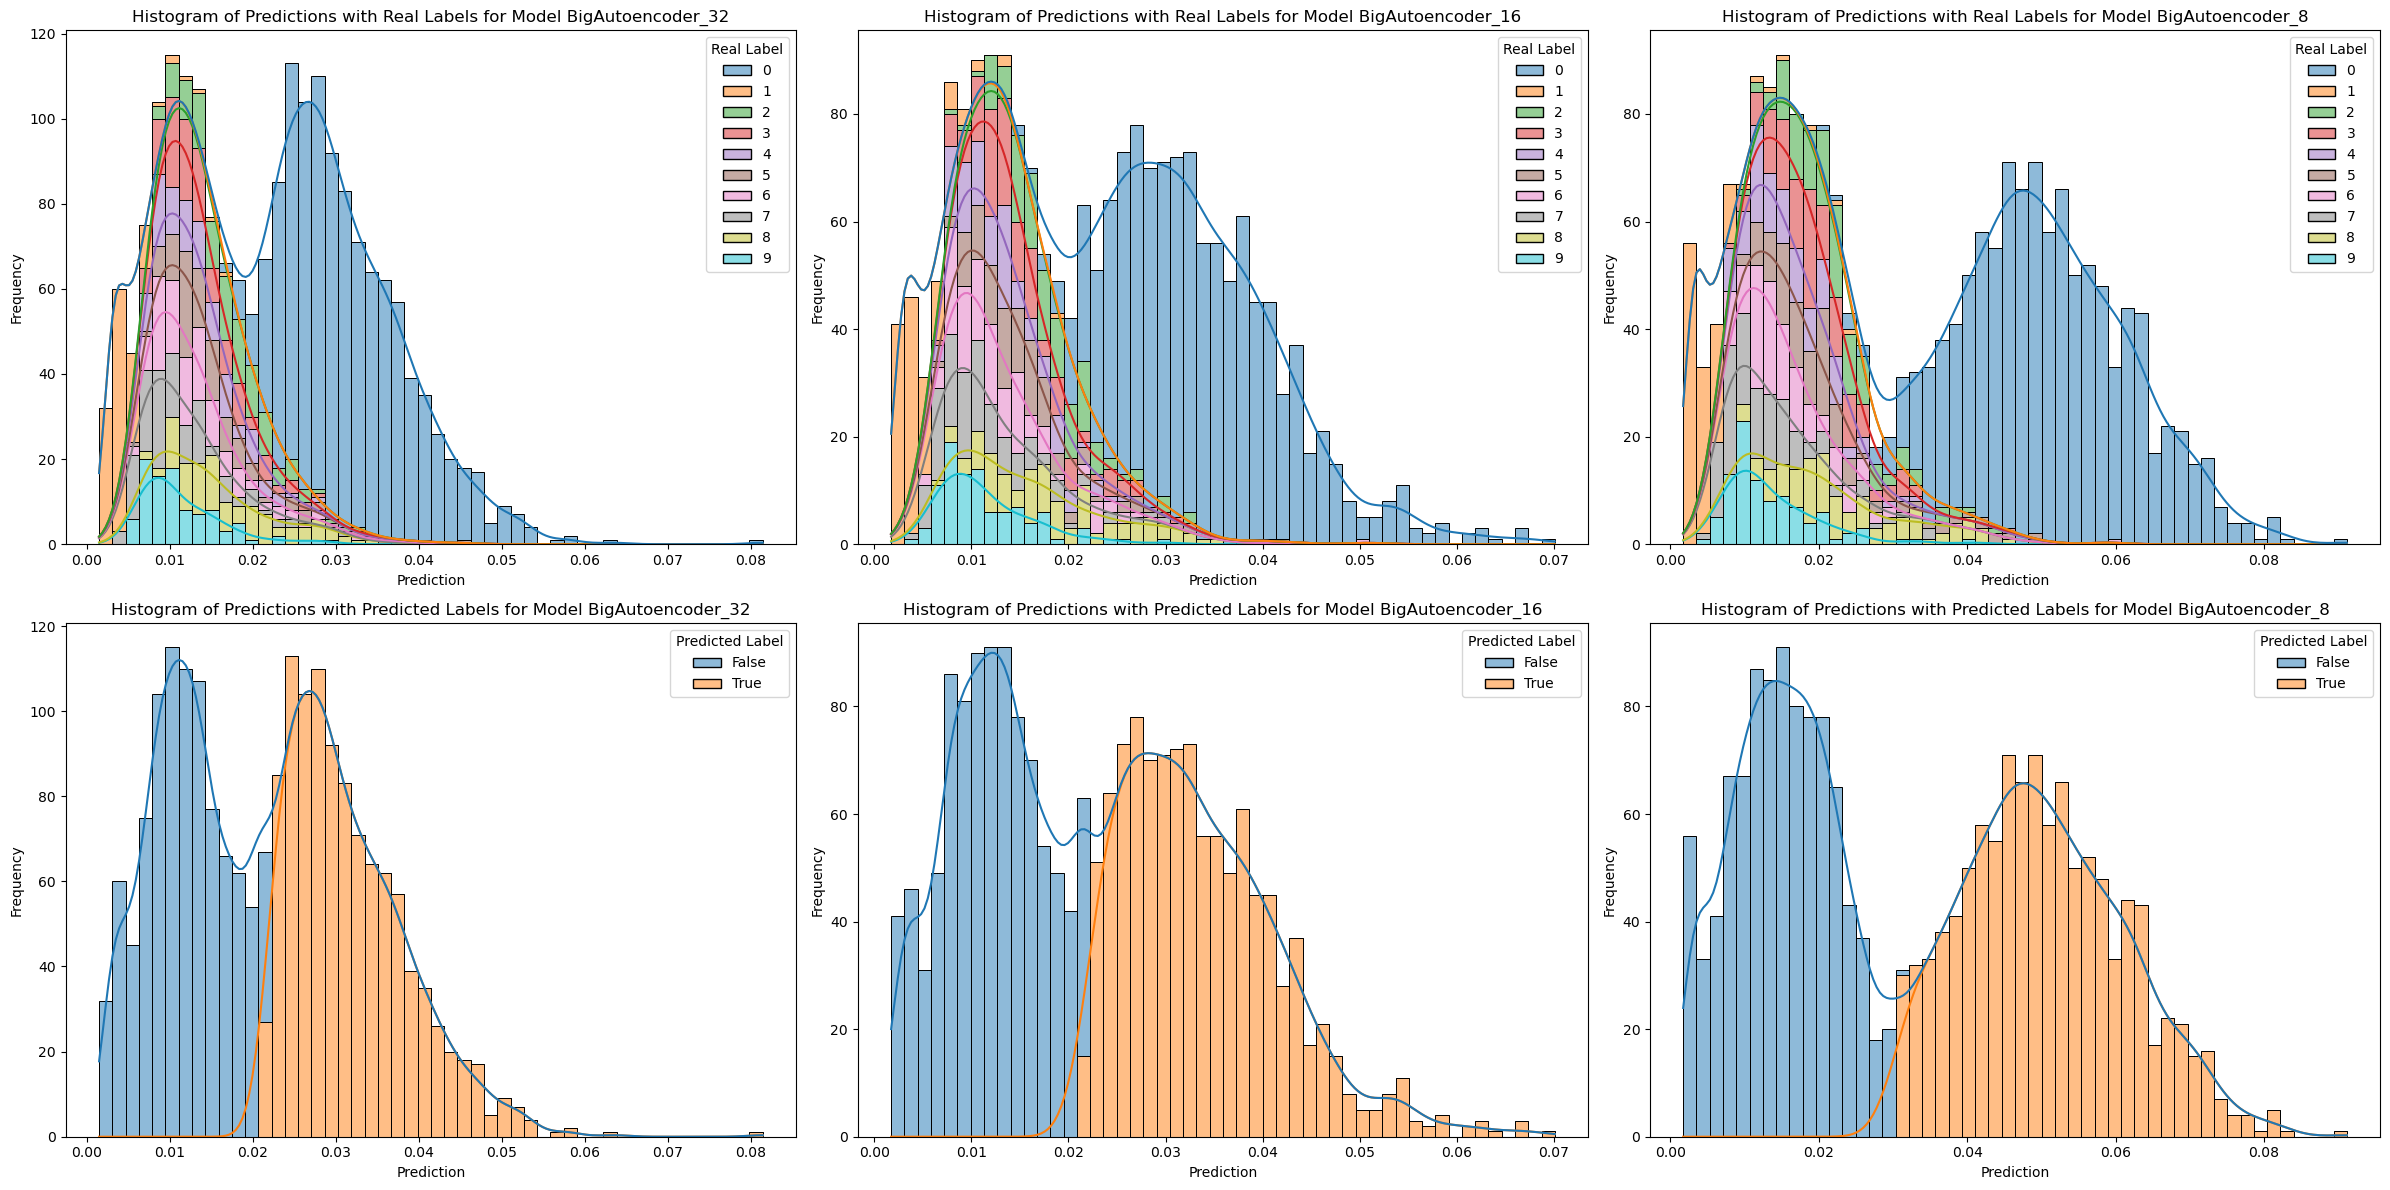

In [93]:
import seaborn as sns
import pandas as pd

names = {
    0: 'BigAutoencoder_32',
    1: 'BigAutoencoder_16',
    2: 'BigAutoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

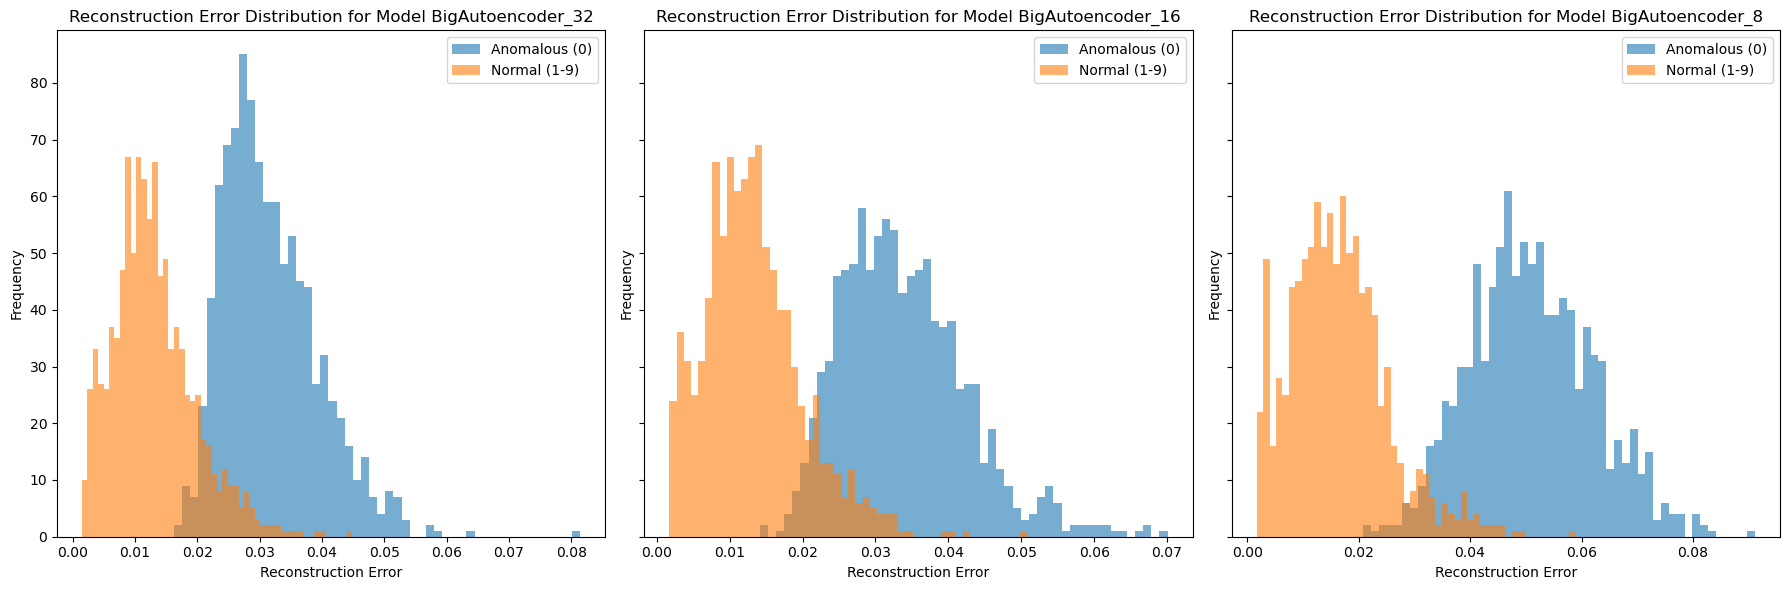

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

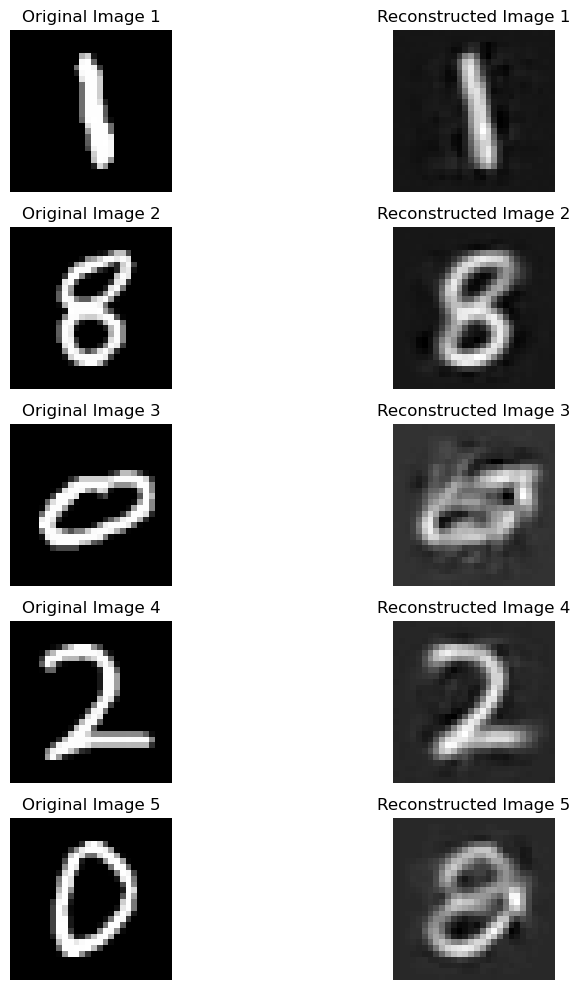

In [95]:
import matplotlib.pyplot as plt

# Function to plot original and reconstructed images
def plot_examples(data_loader, model, num_examples=5, x=6):
    model.eval()
    with torch.no_grad():
        for batch in data_loader:
            x = x-1
            if x == 0:
                inputs, _ = batch
                inputs = inputs.to(device)
                outputs = model(inputs)
                break

    fig, axes = plt.subplots(num_examples, 2, figsize=(10, 10))
    for i in range(num_examples):
        original_image = inputs[i].cpu().view(28, 28).detach().numpy()
        reconstructed_image = outputs[i].cpu().view(28, 28).detach().numpy()

        axes[i, 0].imshow(original_image, cmap='gray')
        axes[i, 0].set_title(f'Original Image {i+1}')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(reconstructed_image, cmap='gray')
        axes[i, 1].set_title(f'Reconstructed Image {i+1}')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Plot examples from the test_loader
plot_examples(test_loader, models[2])

## Autoencoder

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/20], Train_loss: 0.0422, Val_loss: 0.0323
Model nr 0. Epoch [2/20], Train_loss: 0.0266, Val_loss: 0.0269
Model nr 0. Epoch [3/20], Train_loss: 0.0224, Val_loss: 0.0234
Model nr 0. Epoch [4/20], Train_loss: 0.0199, Val_loss: 0.0214
Model nr 0. Epoch [5/20], Train_loss: 0.0185, Val_loss: 0.0200
Model nr 0. Epoch [6/20], Train_loss: 0.0174, Val_loss: 0.0190
Model nr 0. Epoch [7/20], Train_loss: 0.0164, Val_loss: 0.0180
Model nr 0. Epoch [8/20], Train_loss: 0.0156, Val_loss: 0.0171
Model nr 0. Epoch [9/20], Train_loss: 0.0150, Val_loss: 0.0162
Model nr 0. Epoch [10/20], Train_loss: 0.0144, Val_loss: 0.0156
Model nr 0. Epoch [11/20], Train_loss: 0.0140, Val_loss: 0.0154
Model nr 0. Epoch [12/20], Train_loss: 0.0136, Val_loss: 0.0146
Model nr 0. Epoch [13/20], Train_loss: 0.0133, Val_loss: 0.0143
Model nr 0. Epoch [14/20], Train_loss: 0.0129, Val_loss: 0.0140
Model nr 0. Epoch [15/20], Train_loss: 0.0126, Val_loss: 0.0138
Model nr 0. Epoch [16/2

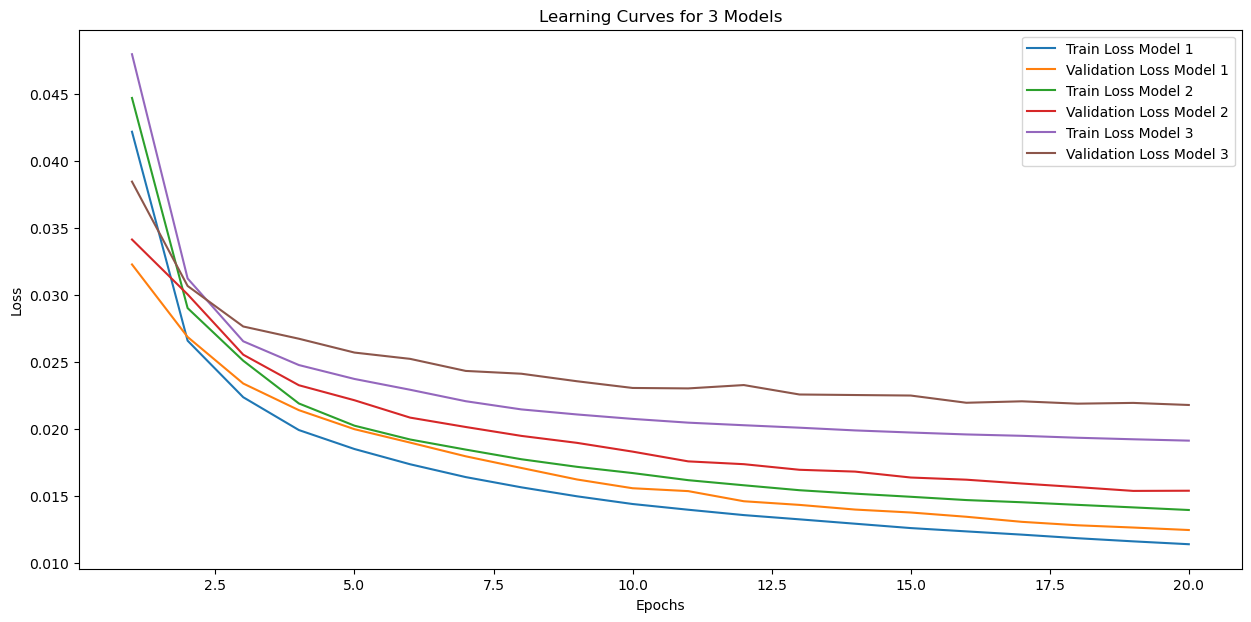

In [ ]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = Autoencoder()
model_2 = Autoencoder_16()
model_3 = Autoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 20
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# adding models to list
ALL_MODELS.append(models)

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()


In [97]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == 0
    # indices of other digits
    other_indices = sorted_labels_indices != 0
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)



Model nr 0. Best Threshold: 0.4211
Model nr 0. Precision at Best Threshold: 0.7729
Model nr 0. Recall at Best Threshold: 0.8950
Model nr 1. Best Threshold: 0.4211
Model nr 1. Precision at Best Threshold: 0.8264
Model nr 1. Recall at Best Threshold: 0.9570
Model nr 2. Best Threshold: 0.4737
Model nr 2. Precision at Best Threshold: 0.8993
Model nr 2. Recall at Best Threshold: 0.9470


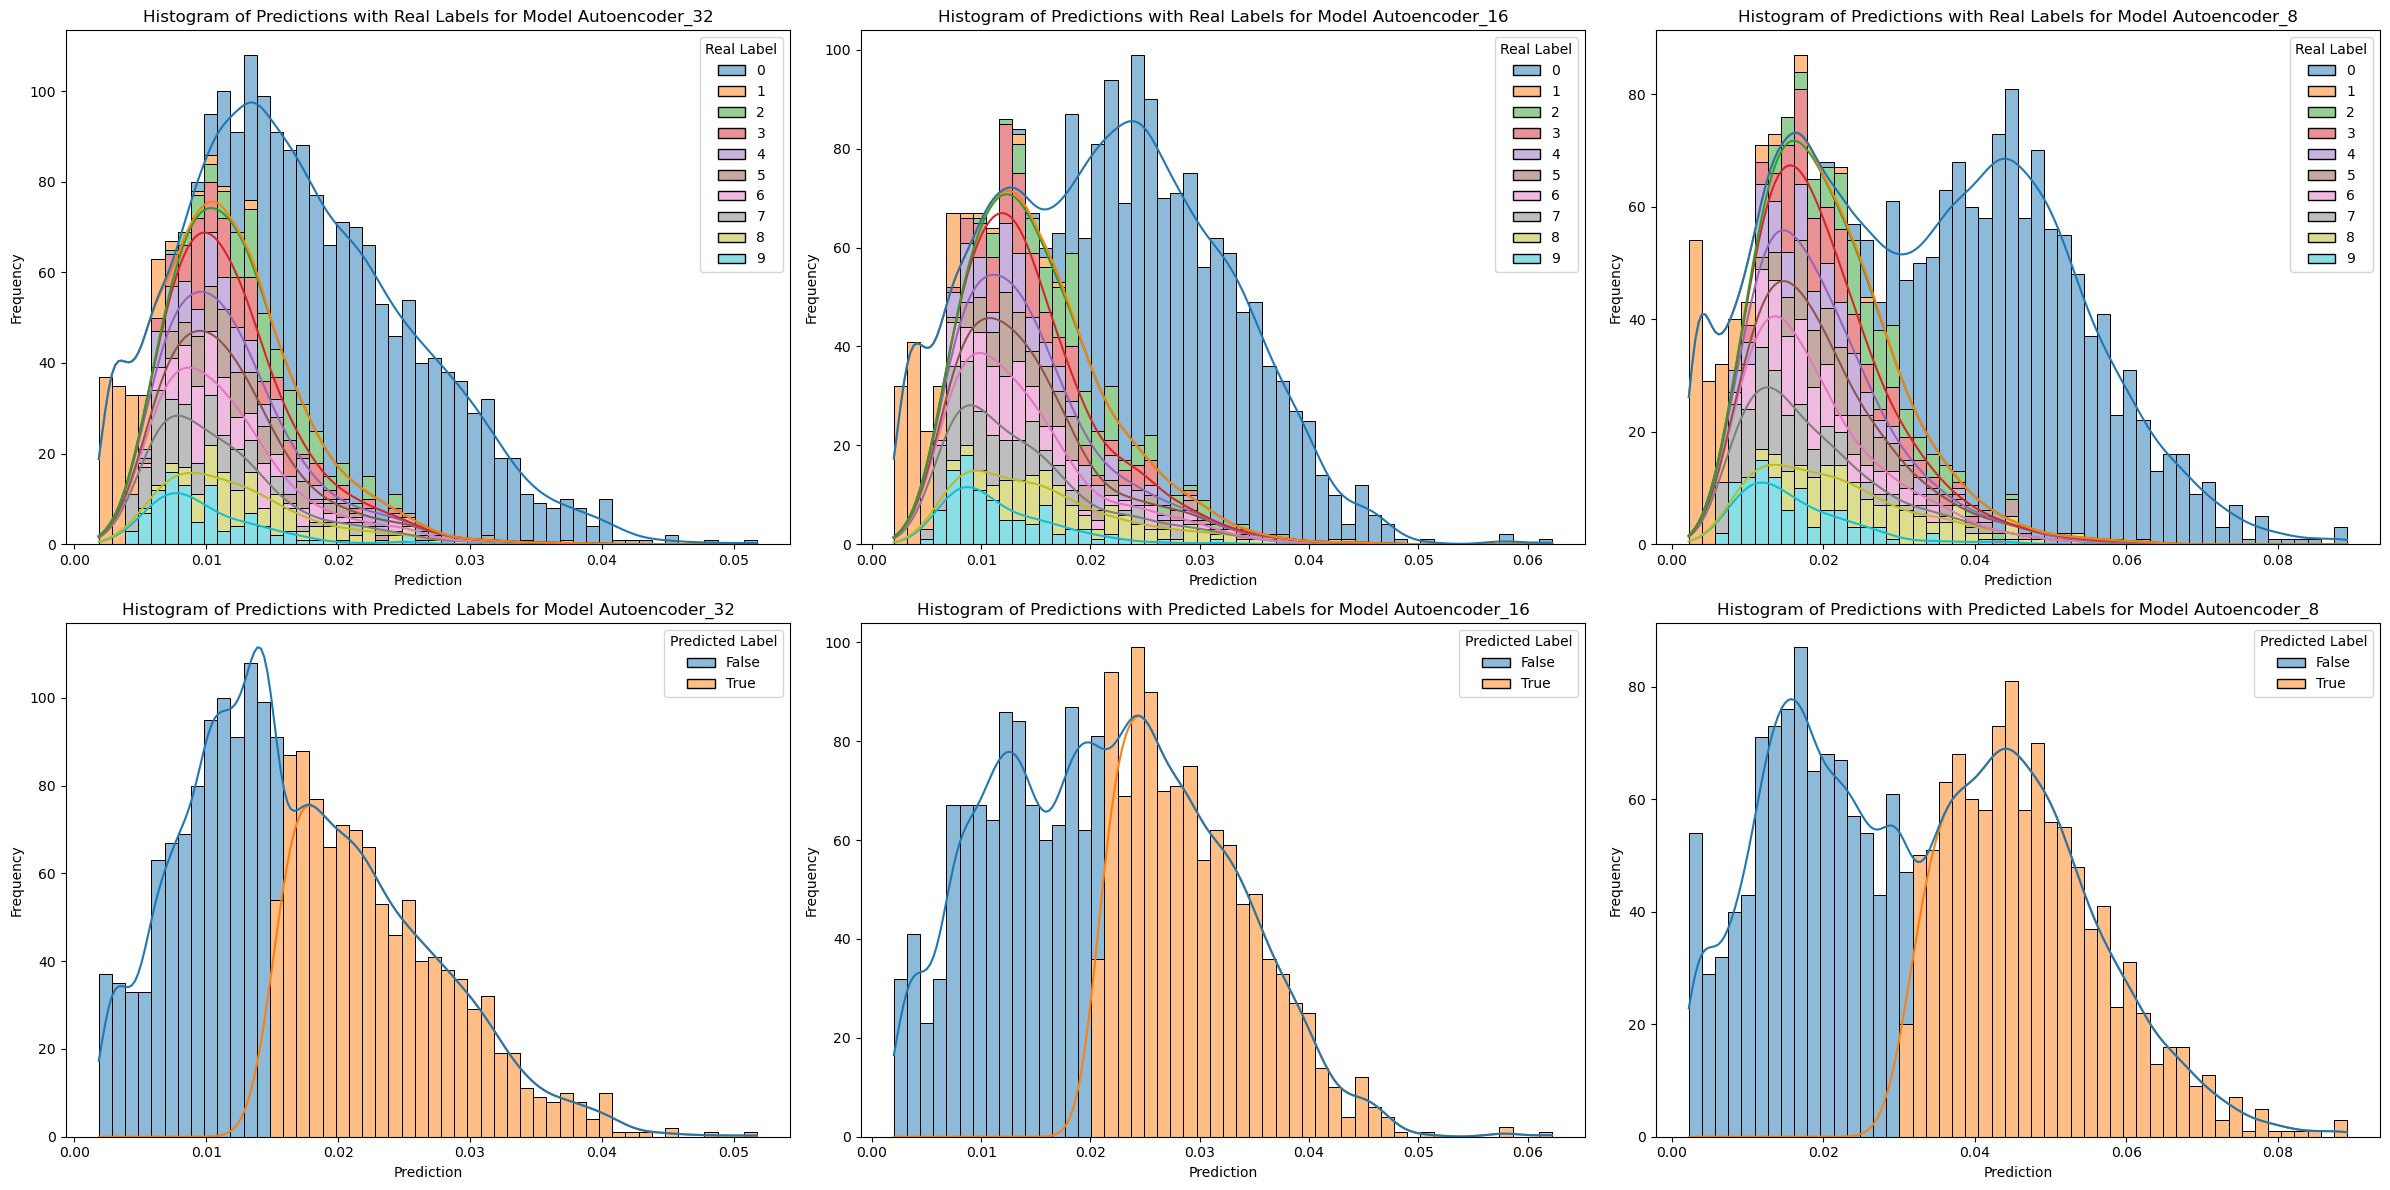

In [98]:
import seaborn as sns
import pandas as pd

names = {
    0: 'Autoencoder_32',
    1: 'Autoencoder_16',
    2: 'Autoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

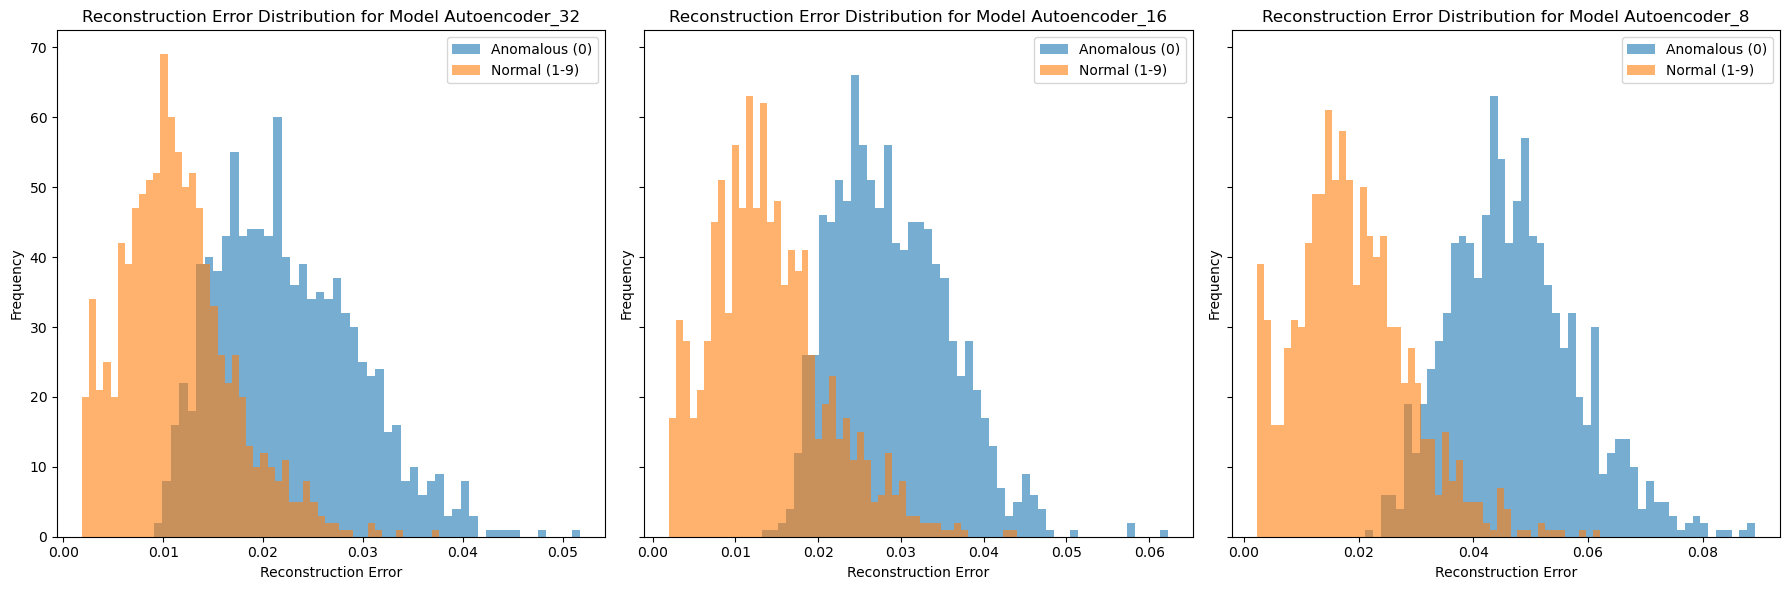

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

# SNN

In [121]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.ae = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        return self.ae(x)

## Sinabs

In [150]:
def conversion_ann_snn(ann_model):
    result = nn.Sequential()
    for name, layer in ann_model.encoder.named_children():
        result.add_module(f"encoder_{name}", layer)
    for name, layer in ann_model.decoder.named_children():
        result.add_module(f"decoder_{name}", layer)
    return result

a = conversion_ann_snn(models[2])
print(a)

Sequential(
  (encoder_0): Linear(in_features=784, out_features=256, bias=True)
  (encoder_1): ReLU()
  (encoder_2): Linear(in_features=256, out_features=128, bias=True)
  (encoder_3): ReLU()
  (encoder_4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_5): ReLU()
  (encoder_6): Linear(in_features=64, out_features=8, bias=True)
  (decoder_0): Linear(in_features=8, out_features=64, bias=True)
  (decoder_1): ReLU()
  (decoder_2): Linear(in_features=64, out_features=128, bias=True)
  (decoder_3): ReLU()
  (decoder_4): Linear(in_features=128, out_features=256, bias=True)
  (decoder_5): ReLU()
  (decoder_6): Linear(in_features=256, out_features=784, bias=True)
)


In [151]:
class MNIST(datasets.MNIST):
    def __init__(self, root, train=True, is_spiking=False, time_window=100):
        super().__init__(
            root=root, train=train, download=True, transform=transforms.ToTensor()
        )
        self.is_spiking = is_spiking
        self.time_window = time_window

    def __getitem__(self, index):
        img, target = self.data[index].view(1, -1), self.targets[index]
        # img is now a tensor of 1x784

        if self.is_spiking:
            img = (torch.rand(self.time_window, *img.shape) < img).float()

        return img, target

In [152]:
from sinabs.from_torch import from_model

input_shape = (1, 784)
num_timesteps = 100  # per sample

sinabs_model = from_model(
    a, input_shape=input_shape, add_spiking_output=True, synops=False, num_timesteps=num_timesteps
)

In [153]:
sinabs_model.spiking_model

Sequential(
  (encoder_0): Linear(in_features=784, out_features=256, bias=True)
  (encoder_1): IAFSqueeze(spike_threshold=Parameter containing:
  tensor(1., device='mps:0'), min_v_mem=Parameter containing:
  tensor(-1., device='mps:0'), batch_size=-1, num_timesteps=100)
  (encoder_2): Linear(in_features=256, out_features=128, bias=True)
  (encoder_3): IAFSqueeze(spike_threshold=Parameter containing:
  tensor(1., device='mps:0'), min_v_mem=Parameter containing:
  tensor(-1., device='mps:0'), batch_size=-1, num_timesteps=100)
  (encoder_4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_5): IAFSqueeze(spike_threshold=Parameter containing:
  tensor(1., device='mps:0'), min_v_mem=Parameter containing:
  tensor(-1., device='mps:0'), batch_size=-1, num_timesteps=100)
  (encoder_6): Linear(in_features=64, out_features=8, bias=True)
  (decoder_0): Linear(in_features=8, out_features=64, bias=True)
  (decoder_1): IAFSqueeze(spike_threshold=Parameter containing:
  tensor(1., devic

In [138]:
test_batch_size = 10

spike_mnist_test = MNIST(
    "../data", train=False, is_spiking=True, time_window=num_timesteps
)
spike_test_loader = DataLoader(
    spike_mnist_test, batch_size=test_batch_size, shuffle=True
)

In [157]:
import sinabs.layers as sl
import tqdm

correct_predictions = []

for data, target in tqdm.tqdm(spike_test_loader):
    data, target = data.to(device), target.to(device)
    data = sl.FlattenTime()(data)
    with torch.no_grad():
        output = sinabs_model(data)
        output = output.view(test_batch_size, -1, output.shape[-1])

    # get the index of the max log-probability
    pred = output.sum(1).argmax(dim=1, keepdim=True)

    # Compute the total correct predictions
    correct_predictions.append(pred.eq(target.view_as(pred)))
    if len(correct_predictions) * test_batch_size >= 300:
        break

correct_predictions = torch.cat(correct_predictions)
print(
    f"Classification accuracy: {correct_predictions.sum().item()/(len(correct_predictions))*100}%"
)

  3%|▎         | 29/1000 [00:07<04:07,  3.93it/s]

Classification accuracy: 0.0%


In [ ]:
# import torch
# import torch.nn as nn
# import sinabs.layers as sl
# from sinabs.from_torch import from_model

# # 1. Convert AE to SNN
# def conversion_ann_snn(ann_model):
#     result = nn.Sequential()
#     for name, layer in ann_model.encoder.named_children():
#         result.add_module(f"encoder_{name}", layer)
#     for name, layer in ann_model.decoder.named_children():
#         result.add_module(f"decoder_{name}", layer)
#     return result

# def convert_to_snn(a, num_steps=100):
#     a = conversion_ann_snn(a)
#     snn = from_model(
#         a,
#         input_shape=(784,),
#         add_spiking_output=True, # ?
#         num_timesteps=num_steps
#     )
#     return snn

# # 2. Detect anomalies using SNN
# def detect_anomalies(snn_model, test_loader, device, threshold_percentile=40):
#     reconstruction_errors = []
    
#     with torch.no_grad():
#         for data, label in test_loader:
#             for example, label in zip(data, label):
#                 example = example.to(device).view(-1, 784)

#                 # Create input spikes
#                 input_spikes = (torch.rand(100, *example.shape, device=device) < example.unsqueeze(0)).float()
#                 print(input_spikes.shape)
#                 # Flatten time dimension for processing
#                 input_spikes = input_spikes.reshape(-1, 784)
#                 print(input_spikes.shape)
#                 # Apply SNN model
#                 output_spikes = snn_model(input_spikes)
#                 print(output_spikes.shape)
#                 # Reshape output and average over time steps
#                 output_spikes = output_spikes.reshape(100, -1, 784)
#                 print(output_spikes.shape)
#                 reconstruction = output_spikes.mean(dim=0)
#                 # Calculate MSE
#                 error = torch.mean((reconstruction - example) ** 2, dim=1)
#                 print(error)
#                 reconstruction_errors.extend(error.cpu().numpy())
    
#     all_predictions = torch.tensor(reconstruction_errors)
#     all_labels = torch.tensor([1 if label == 0 else 0 for label in test_labels])

#     # Set threshold
#     thresholds = torch.linspace(0, 1, 20)
#     for threshold in thresholds:
#         all_predictions, indices = torch.sort(predictions, descending=True)
#         sorted_labels = [all_labels[i] for i in indices.cpu()]
#         neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels[idx]])
#         sorted_labels_indices = torch.tensor(sorted_labels[idx])
        

#     threshold = torch.tensor(reconstruction_errors).quantile(threshold_percentile/100)
#     anomalies = torch.tensor(reconstruction_errors) > threshold
    
#     return anomalies, reconstruction_errors

# # 3. Usage
# trained_ae = models[2]  # Your trained autoencoder
# snn_model = convert_to_snn(trained_ae).to(device)
# anomalies, errors = detect_anomalies(snn_model, val_loader_reduced, device)

In [243]:
# 1. Convert AE to SNN
def conversion_ann_snn(ann_model):
    result = nn.Sequential()
    for name, layer in ann_model.encoder.named_children():
        result.add_module(f"encoder_{name}", layer)
    for name, layer in ann_model.decoder.named_children():
        result.add_module(f"decoder_{name}", layer)
    return result

def convert_to_snn(a, num_steps=100):
    a = conversion_ann_snn(a)
    snn = from_model(
        a,
        input_shape=(784,),
        add_spiking_output=True, # ?
        num_timesteps=num_steps
    )
    return snn

def detect_anomalies_spiking(snn_model, val_loader_reduced, device, num_examples=10000):
    reconstructions = []
    originals = []
    labels = []
    errors = []
    
    with torch.no_grad():
        # Get first batch of examples
        for data, label in val_loader_reduced:
            if len(originals) >= num_examples:
                break
                
            for example, l in zip(data, label):
                if len(originals) >= num_examples:
                    break
                    
                # Create input spikes
                example = example.to(device)
                input_spikes = (torch.rand(100, 1, 784, device=device) < example).float()
                
                # Get reconstruction using spiking model
                output_spikes = snn_model.spiking_model(input_spikes.reshape(-1, 784))
                output_spikes = output_spikes.reshape(100, -1, 784)
                
                # Average spikes over time dimension to get reconstruction
                reconstruction = output_spikes.mean(dim=0).squeeze()
                
                # Calculate reconstruction error
                error = torch.mean((reconstruction - example) ** 2)
                
                # Store results
                reconstructions.append(reconstruction.cpu())
                originals.append(example.cpu())
                labels.append(l.cpu())
                errors.append(error.cpu())
    return errors, reconstructions, originals, labels
                
    # # Plot results
    # fig, axes = plt.subplots(num_examples, 2, figsize=(10, 30))
    
    # for i in range(num_examples):
    #     original = originals[i].view(28, 28).numpy()
    #     reconstruction = reconstructions[i].view(28, 28).numpy()
        
    #     axes[i, 0].imshow(original, cmap='gray')
    #     axes[i, 0].set_title(f'Original (Label: {labels[i]})')
    #     axes[i, 0].axis('off')
        
    #     axes[i, 1].imshow(reconstruction, cmap='gray')
    #     axes[i, 1].set_title('Reconstruction')
    #     axes[i, 1].axis('off')
    
    # plt.tight_layout()
    # plt.show()

def check_thresholds(errors, labels):
    f1_scores = []

    # Sort the errors and get corresponding labels
    errors = torch.tensor(errors)
    sorted_errors, indices = torch.sort(errors, descending=True)
    sorted_labels = [labels[i] for i in indices.cpu()]

    thresholds = torch.linspace(0, 1, 20)
    # Calculate metrics at different thresholds
    for threshold in thresholds:
        # Determine predictions based on threshold
        predictions = sorted_errors >= torch.quantile(errors, threshold)
        
        # Convert labels to binary (0 for anomaly, 1 for normal)
        binary_labels = torch.tensor([1 if label != 0 else 0 for label in sorted_labels])
        
        # Calculate confusion matrix values
        tp = torch.sum((predictions == True) & (binary_labels == 0))
        fp = torch.sum((predictions == True) & (binary_labels == 1))
        tn = torch.sum((predictions == False) & (binary_labels == 1))
        fn = torch.sum((predictions == False) & (binary_labels == 0))
        
        # Calculate metrics
        precision = tp / (tp + fp) if (tp + fp) > 0 else torch.tensor(0.)
        recall = tp / (tp + fn) if (tp + fn) > 0 else torch.tensor(0.)
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else torch.tensor(0.)
        
        f1_scores.append(f1)

    # find the best threshold according to f1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores))
    best_threshold = thresholds[best_threshold_index]
    best_f1_score = f1_scores[best_threshold_index]

    return best_threshold, best_f1_score, indices, sorted_labels, sorted_errors


In [244]:
trained_ae = models[2]  # trained autoencoder
snn_model = convert_to_snn(trained_ae).to(device)

errors, reconstructions, originals, labels = detect_anomalies_spiking(snn_model, val_loader_reduced, device)
best_threshold, best_f1_score, indices, sorted_labels, sorted_errors = check_thresholds(errors, labels)

positive_class = torch.tensor(sorted_errors) >= torch.quantile(torch.tensor(sorted_errors), best_threshold)
negative_class = torch.tensor(sorted_errors) < torch.quantile(torch.tensor(sorted_errors), best_threshold)

neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels])
sorted_labels_indices = torch.tensor(sorted_labels)
# indices of 0
zeros_indices = sorted_labels_indices == 0
# indices of other digits
other_indices = sorted_labels_indices != 0

tp = positive_class[zeros_indices].sum()
fn = negative_class[zeros_indices].sum()
tn = negative_class[other_indices].sum()
fp = positive_class[other_indices].sum()

tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

best_precision = tp/(tp + fp)
best_recall = tp/(tp + fn)

print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')

Model nr 2. Best Threshold: 0.4737
Model nr 2. Precision at Best Threshold: 0.8984
Model nr 2. Recall at Best Threshold: 0.9460


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_38345/2057230012.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  positive_class = torch.tensor(sorted_errors) >= torch.quantile(torch.tensor(sorted_errors), best_threshold)
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_38345/2057230012.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  negative_class = torch.tensor(sorted_errors) < torch.quantile(torch.tensor(sorted_errors), best_threshold)


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_38345/3848587002.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  errors_np = torch.tensor(sorted_errors).cpu()
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_38345/3848587002.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_labels_np = (errors_np >= torch.quantile(torch.tensor(sorted_errors), best_threshold)).cpu()


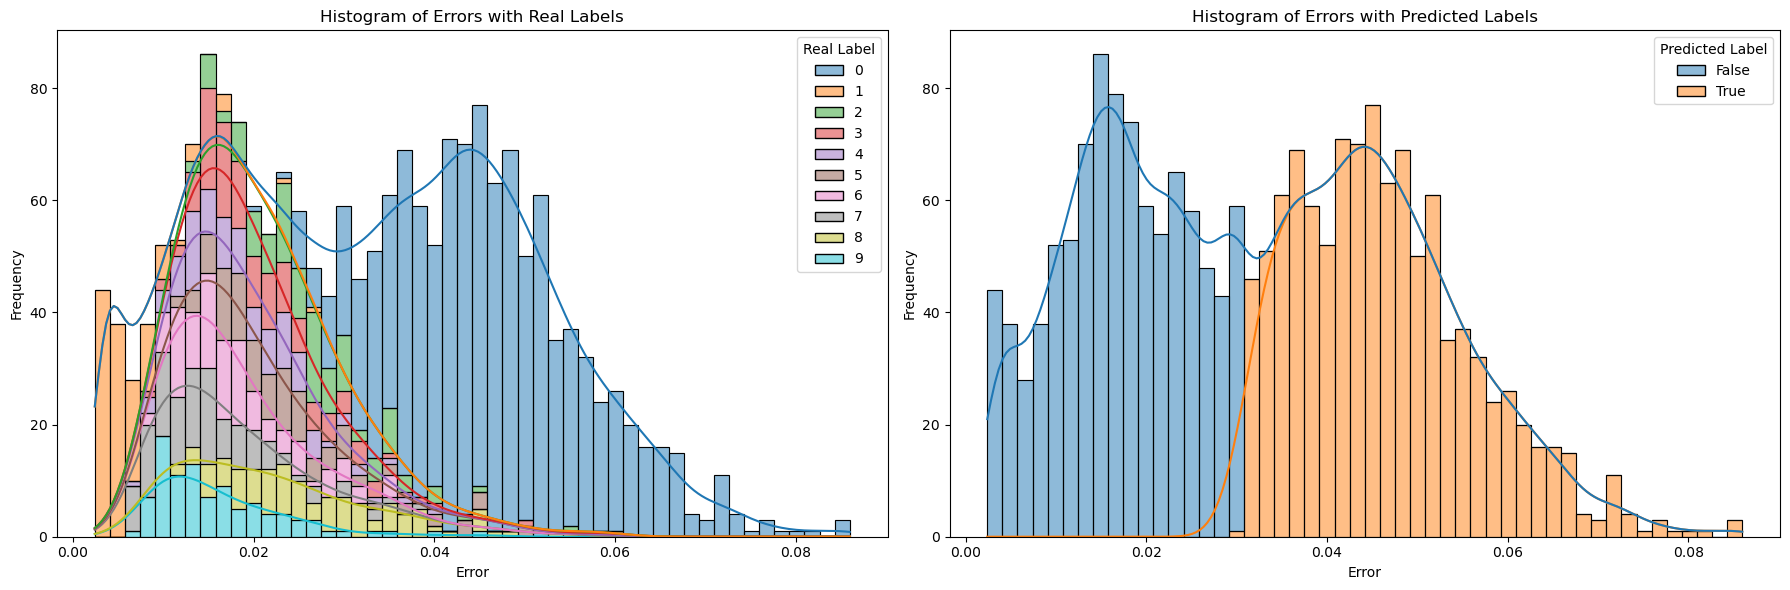

In [246]:
import seaborn as sns
import pandas as pd

# Convert errors and labels to numpy arrays for plotting
errors_np = torch.tensor(sorted_errors).cpu()
sorted_labels_np = torch.tensor(sorted_labels).cpu()
predicted_labels_np = (errors_np >= torch.quantile(torch.tensor(sorted_errors), best_threshold)).cpu()

# Create a DataFrame for easier plotting
data = {
    'Error': errors_np,
    'Real Label': sorted_labels_np,
    'Predicted Label': predicted_labels_np
}

df = pd.DataFrame(data)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the histogram of errors with real labels
sns.histplot(data=df, x='Error', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Errors with Real Labels')
axes[0].set_xlabel('Error')
axes[0].set_ylabel('Frequency')

# Plot the histogram of errors with predicted labels
sns.histplot(data=df, x='Error', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Errors with Predicted Labels')
axes[1].set_xlabel('Error')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

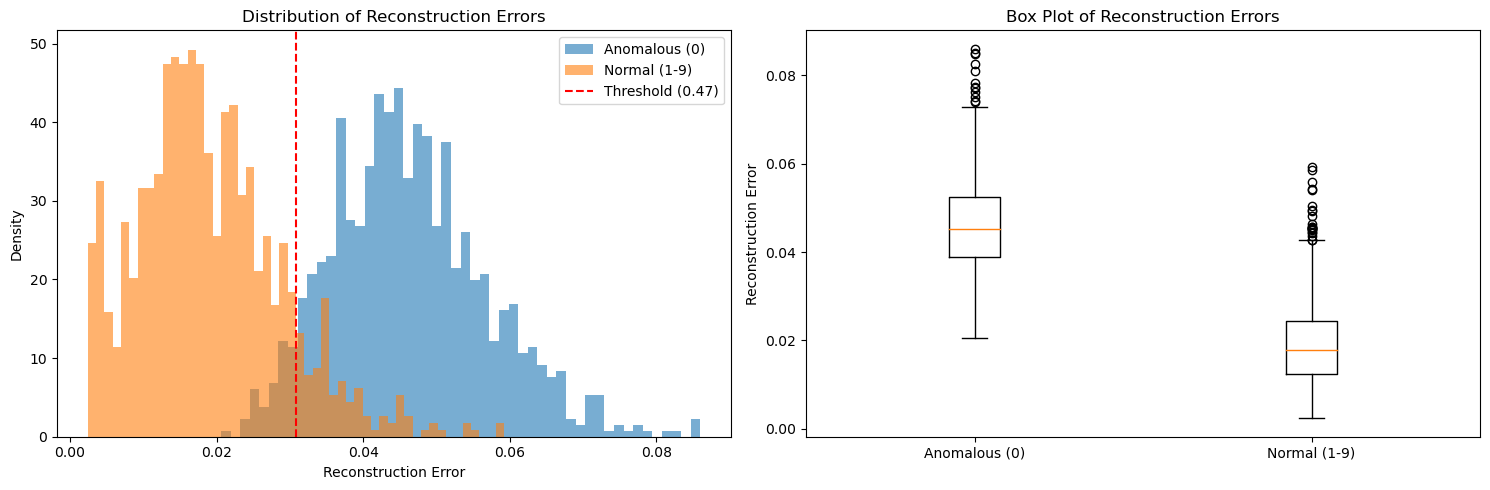

In [247]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Histogram of errors separated by normal vs anomalous
anomalous_errors = sorted_errors[sorted_labels_np == 0]
normal_errors = sorted_errors[sorted_labels_np != 0]

axes[0].hist(anomalous_errors.cpu(), bins=50, alpha=0.6, label='Anomalous (0)', density=True)
axes[0].hist(normal_errors.cpu(), bins=50, alpha=0.6, label='Normal (1-9)', density=True)
axes[0].axvline(torch.quantile(sorted_errors, best_threshold).cpu(), color='r', linestyle='--', 
                label=f'Threshold ({best_threshold:.2f})')
axes[0].set_xlabel('Reconstruction Error')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Reconstruction Errors')
axes[0].legend()

# Plot 2: Box plot comparison
box_data = [anomalous_errors.cpu().numpy(), normal_errors.cpu().numpy()]
axes[1].boxplot(box_data, labels=['Anomalous (0)', 'Normal (1-9)'])
axes[1].set_ylabel('Reconstruction Error')
axes[1].set_title('Box Plot of Reconstruction Errors')

plt.tight_layout()
plt.show()